### *Hose Price prediction using `Linear Regression`*
```
Goal is to predict house prices based on features like area, bathroom, balconies, etc
```
#### *Author - Niranjan*

### *Installing the necessary libraries*

In [5]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------- -------------------------- 2.9/8.7 MB 15.2 MB/s eta 0:00:01
   ------------- -------------------------- 2.9/8.7 MB 15.2 MB/s eta 0:00:01
   ------------------- -------------------- 4.2/8.7 MB 6.5 MB/s eta 0:00:01
   ---------------------- ----------------- 5.0/8.7 MB 6.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 5.8 MB/s eta 0:00:01
   ------------------------------ --------- 6.6/8.7 MB 5.1 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 4.9 MB/s eta 0:00:01
   -------------------------------------- - 8.4/8.7 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.8 MB/s eta 0:00:00


### *Environmental Setup*

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### *Loading the data*

In [7]:
df = pd.read_csv("house_prices.csv")

### *Data Understanding*

In [8]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

#### *Key observation*
- *Target Column: `Price (in rupees)` (float but has missing value - 169866 no null out of 187,531*
- *Features: There is 20+ columns (location, Carpet Area, Floor, Furnishing, etc*
- *Issues*
1. Many object columns(string) - need cleaning/ encoding.
2. Columns like `Carpet Area`, `Bathroom`, `Balcony` are stored ad object (should be numerics.)
3. Some Columns (`Dimensions`, `Plot Area`) have 0 valid values - useless - drop.
4. `Ammount (in rupees)` is stored as `object` (probably has commas, symbols like ruppes)
5. Thers is missing values in almost each and every column.

In [10]:
df.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


### *Data Cleaning*

In [12]:
# Index - just row index, no predictive power
# Dimension & Plot Area has 0 valid values 
df.drop(columns= ["Index", "Dimesions", "Plot Area"], inplace = True, errors = "ignore")

In [13]:
# Handling the Target column (Price)
# Drop rows where price is in rupees is missing (cant train without target)
df = df.dropna(subset = ["Price (in rupees)"])

In [15]:
# Fix Numeric columns stored as Text
# Example: " Ammount (in rupees)" might look like "25,00,000"
df["Amount(in rupees)"] = (
    df["Amount(in rupees)"]
    .str.replace(",","", regex = True) # Remove commas)
    .str.extract(r"(\d+)") # Keep only digit
    .astype(float)
)

In [16]:
# Carpet Area - many contains "sqft", "Sq. Meters", etc
if "Carpet Area" in df.columns:
    df["Carpet Area"] = (
    df["Carpet Area"]
    .astype(str)
    .str.replace(",","",regex = True)
    .str.extract(r"(\d+.?\d*)") # Extract numbers (handle decimas too)
    .astype(float)
    )    

In [17]:
# Bathroom, BAlcony, Car Parking, Super Area - Convert to numeic
for col in ["Bathroom", "Balcony", "Car PArking", "Super Area"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.extract(r"(\d+\.?\d*)")
            .astype(float)
        )

In [20]:
# HAndle Missing values
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [21]:
# Categorical : Fill missing values with Unknown
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [22]:
# Final Check
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 169866 entries, 0 to 187530
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Title              169866 non-null  object 
 1   Description        169866 non-null  object 
 2   Amount(in rupees)  169866 non-null  float64
 3   Price (in rupees)  169866 non-null  float64
 4   location           169866 non-null  object 
 5   Carpet Area        169866 non-null  float64
 6   Status             169866 non-null  object 
 7   Floor              169866 non-null  object 
 8   Transaction        169866 non-null  object 
 9   Furnishing         169866 non-null  object 
 10  facing             169866 non-null  object 
 11  overlooking        169866 non-null  object 
 12  Society            169866 non-null  object 
 13  Bathroom           169866 non-null  float64
 14  Balcony            169866 non-null  float64
 15  Car Parking        169866 non-null  object 
 16  Ownersh

In [23]:
print (df.describe())

       Amount(in rupees)  Price (in rupees)    Carpet Area       Bathroom  \
count      169866.000000       1.698660e+05  169866.000000  169866.000000   
mean           35.645727       7.583772e+03    1139.733778       2.444391   
std            31.889110       2.724171e+04    2392.272437       0.847787   
min             1.000000       0.000000e+00       1.000000       1.000000   
25%             2.000000       4.297000e+03    1000.000000       2.000000   
50%            32.000000       6.034000e+03    1050.000000       2.000000   
75%            64.000000       9.450000e+03    1140.000000       3.000000   
max          1400.000000       6.700000e+06  709222.000000      10.000000   

             Balcony     Super Area  Dimensions  
count  169866.000000  169866.000000         0.0  
mean        2.024566    1280.273786         NaN  
std         0.823436     455.249634         NaN  
min         1.000000       1.000000         NaN  
25%         2.000000    1255.000000         NaN  
50%   

#### *Key Obsrvation*
- *Target (`Price (in rupees)`) is redy for regression.*
- *Numeric Feature columns available are :-*
1. `Amount(in rupees)`
2. `Carpet Area`
3. `Bathroom`
4. `Balcony`
5. `Super Area`
- *Categorical features:*
1. `location`
2. `Status`
3. `Floor`
4. `Transaction`
5. `Furnishing`
6. `facing`
7. `overlooking`
8. `Society`
9. `Car Parking`
10. `ownership`
- *Issues*
1. `Price (in rupees)` has extreme values (outliers) - max = 6,700,000 vs median ` 6034
2. `Carpet Area` also has crazy values (max = 709,222 sqft) - outliers need handling.
3. `Dimenions` is still all null - drop it 

### *Outlier Removal*

```
Since we have observed outliers 
this is the best time to del with the outliers as linear Regression
is sensitive to outliers.
Fixes:- 
1. Remove rows beyond a certain percentile (99th percentile)
2. Apply log transformation on skewed columns (eg - Price)

```

In [29]:
# Remove extrme outliers (uisng percentile cutoffs)
# I have clip/ remove values beyond the 1st percentile (too small) and the 99th percentile (tto large) for numeric features 
num_cols = ["Amount(in rupees)", "Carpet Area", "Bathroom", "Balcony", "Super Area", "Price (in rupees)"]

# For each column, keep only values withing 1st to 99th percentile
for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print ("Data shape afer outlier removal:", df.shape)

Data shape afer outlier removal: (160262, 18)


In [33]:
# Apply log transformation to target and skewed featres
df["Price_log"] = np.log1p(df["Price (in rupees)"])
df["Carpet Area_log"] = np.log1p(df["Carpet Area"])
df["Super Area_log"] = np.log1p(df["Super Area"])

In [35]:
X = df[["Amount(in rupees)", "Carpet Area_log", "Bathroom", "Balcony", "Super Area_log"]]
y = df["Price_log"]

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

Feature matrix shape: (160262, 5)
Target shape: (160262,)


### *Feature Engineering*

In [24]:
# Drop the Dimension column (all null)
df.drop(columns = ["Dimensions"], inplace = True, errors = "ignore")

In [26]:
# Select features (numeric only for now)
X = df[["Amount(in rupees)", "Carpet Area", "Bathroom", "Balcony", "Super Area"]]
y = df["Price (in rupees)"]

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

Feature matrix shape: (169866, 5)
Target shape: (169866,)


### *Modeling - Linar Regression*

In [36]:
# Train - Test Split
# We will split the data so we can test how well the model generalizes

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [37]:
# Tarin LInea rregression model

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
# Make predictions
y_pred = model.predict(X_test)

In [40]:
# Evaluation Model

# Root Mean Squared Error (easier to interpret than MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 0.42793976155864516
R² Score: 0.23545156629301123


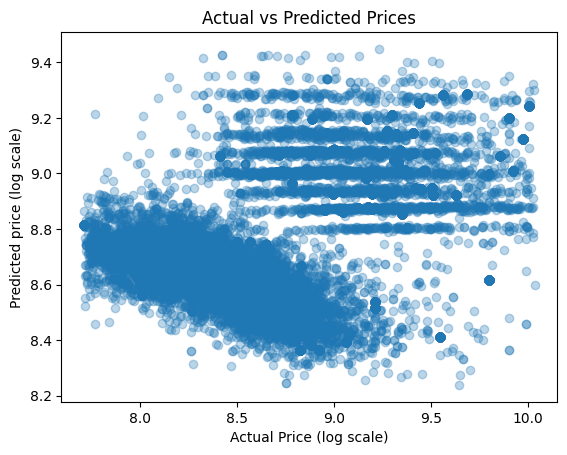

In [43]:
# Visualize prediction 

plt.scatter(y_test, y_pred, alpha = 0.3)
plt.xlabel("Actual Price (log scale)")
plt.ylabel("Predicted price (log scale)")
plt.title("Actual vs Predicted Prices")
plt.show()

### *Evaluation & Improvement*

In [44]:
# Check for the performance

print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 0.42793976155864516
R² Score: 0.23545156629301123


In [45]:
# Back transformation Prediction (from log - actual rupees)
y_test_actual = np.expm1(y_test)   # back to original
y_pred_actual = np.expm1(y_pred)

In [46]:
# Now we can evaluate in rupees 
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print("RMSE in Rupees:", rmse_actual)

RMSE in Rupees: 3368.3595079122065


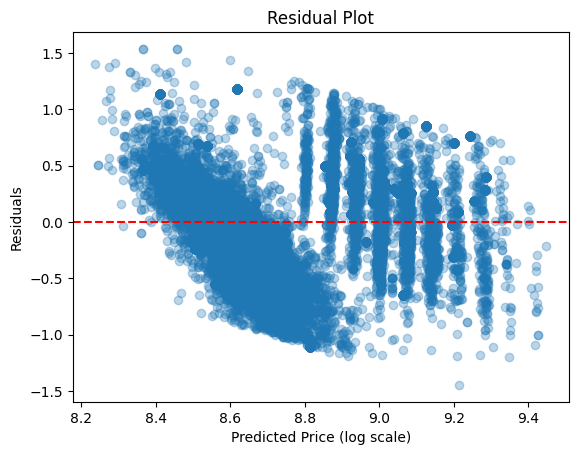

In [47]:
# Visualization Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Price (log scale)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


### *Conclusion*
- *Linear Regression explains ~X% variance in house prices (R² score).*
- *RMSE is around Y (in log scale).*
- *Improvements: encode categorical features, try advanced models.*